In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.stats.multitest as multi
from sklearn.decomposition import PCA
import pickle

sns.set_style('white')
%matplotlib inline

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['font.weight'] = 'bold'

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

### Load in processed data from Cedars_Data_Processing.ipynb

In [12]:
df_rel_sort_list = pickle.load(open('pickle_files/rel_sort_lod_list.pkl', 'rb'))
df_abs_sort_list = pickle.load(open('pickle_files/abs_sort_lod_list.pkl', 'rb'))

df_pseudo_rel_sort_list = pickle.load(open('pickle_files/pseudo_rel_sort_lod_list.pkl', 'rb'))
df_pseudo_abs_sort_list = pickle.load(open('pickle_files/pseudo_abs_sort_lod_list.pkl', 'rb'))

df_col_names_list = pickle.load(open('pickle_files/col_names_lod_list.pkl', 'rb'))
df_metadata = pickle.load(open('pickle_files/metadata_all.pkl', 'rb'))

In [13]:
# Color palette
pal = sns.cubehelix_palette(20, rot=-.25, light=0.7)

In [14]:
def get_important_features(PC1, PC2, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on PCA
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(PC1)
    yvector = components_[1] * max(PC2)

    # Sort each column by it's length.
    important_features = { columns[i] : (xvector[i], yvector[i], np.sqrt(xvector[i]**2 + yvector[i]**2)) for i in range(num_columns) }
    
    return important_features


### PCA on log transformed values

In [15]:
# Perform log transform on pseudocount values

df_pseudo_abs_log_list = [None]*6

for i in range(6):
    df_pseudo_abs_log_list[i] = np.log10(df_pseudo_abs_sort_list[i])

In [16]:
# Calculate top 10 principal components for each of the taxonomic levels
pca_list = [PCA(n_components=10), PCA(n_components=10), PCA(n_components=10), PCA(n_components=10), PCA(n_components=10), PCA(n_components=10)]
df_pca_list = [None]*6
for i in range(6):
    df_pca_list[i] = pd.DataFrame(pca_list[i].fit_transform(df_pseudo_abs_log_list[i]), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
                                                                                                 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
    df_pca_list[i]['Sample'] = df_pseudo_abs_log_list[i].index.tolist()
    
    #Merge with metadata
    df_pca_list[i] = df_pca_list[i].merge(df_metadata, left_on='Sample', right_index=True)
df_pca_list[0]

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.309357 -2.207728 -1.367284 -0.673843  1.373674 -1.200488  1.303062   
1    4.305143 -2.375203  4.171164  2.663148  1.211241 -1.595946  0.944059   
2    3.635186  4.608403 -0.263369 -1.829603  2.000261  0.657961  0.552824   
3   -0.649551  3.381998 -0.959204 -2.162824  2.542481 -0.737162 -0.641858   
4    0.946728 -0.298982 -1.413457  0.234601 -0.266377 -0.773524 -0.656356   
..        ...       ...       ...       ...       ...       ...       ...   
245  2.802839 -0.671422  0.143438 -1.252455 -0.748153  0.266413  0.634768   
246 -2.532180  0.363125 -0.284730  1.232586  0.476035  0.005479 -0.598495   
247 -2.141835 -0.860352 -1.577201 -0.019433  0.021337  0.341237 -0.019915   
248  1.374000  2.314311 -1.760103 -0.408404  0.869878 -2.712318 -1.932925   
249 -7.390179  3.850819  2.337280  1.831659  0.187810 -1.290594 -0.460629   

          PC8       PC9      PC10  ...  Prevotella disruptor count  \
0    0.836120 -0.185666 -0.586185  ...           0               0   
1   -1.162879  0.408286 -0.280888  ...           0               0   
2    0.475250 -0.540894  1.476518  ...           0               2   
3    0.537998  1.165477  1.803064  ...           0               2   
4   -0.309244 -0.346123 -0.497327  ...           0               0   
..        ...       ...       ...  ...         ...             ...   
245  0.364633  2.123027  2.807976  ...           1               0   
246  0.051585 -0.467293  0.309490  ...           0               0   
247 -0.305078 -0.298536  0.218310  ...           1               0   
248 -0.011212  0.083271 -0.972462  ...           0               0   
249 -0.649413  0.654366  0.680011  ...           0               0   

     disruptor sum  disruptor percent  Lacto sum   Log IL8  \
0         0.000000       4.064750e-04   1.782660  0.595574   
1         0.000000       8.604938e-04   0.000000  1.745345   
2         6.075084       9.781659e+01   3.499769  1.866092   
3         6.848472       6.695237e+01   6.123787  1.652414   
4         2.736910       7.505051e-02   3.234272  1.171636   
..             ...                ...        ...       ...   
245       0.000000       1.400000e-04   0.000000       NaN   
246       0.000000       7.860262e-06   0.000000       NaN   
247       0.000000       2.366197e-05   3.330958       NaN   
248       0.000000       1.187285e-04   0.000000       NaN   
249       0.000000       2.082616e-07   0.000000       NaN   

    all symptom count (50th)  observed_ASV  Shannon_Diversity  Evenness  
0                        0.0            67           2.649995  0.630247  
1                        3.0            28           2.372844  0.712094  
2                        6.0            13           0.264972  0.103305  
3                        2.0            18           1.474521  0.510149  
4                        4.0            62           2.230434  0.540432  
..                       ...           ...                ...       ...  
245                      6.0            30           2.227956  0.655050  
246                      6.0            39           1.667908  0.455270  
247                      6.0            62           2.728353  0.661077  
248                      6.0            36           2.073629  0.578657  
249                      6.0            38           1.231268  0.338485  

[250 rows x 101 columns]

In [17]:
df_features_list = [None]*6

# Calculate the feature loadings for the first two principal components
for i in range(6):
    df_features_list[i] = pd.DataFrame.from_dict(data=get_important_features(np.array(df_pca_list[i]['PC1']), 
                                                                             np.array(df_pca_list[i]['PC2']), 
                                                                             pca_list[i].components_[0:2], 
                                                                             df_pseudo_abs_log_list[i].columns.values), 
                                                 orient='index', columns=['PC1 Loading', 'PC2 Loading', 'Magnitude'])

df_features_list[4].sort_values('PC2 Loading', ascending=False)[0:10]

PC1 Loading  PC2 Loading  Magnitude
ASV255    -3.311846     3.295403   4.672044
ASV247    -3.434600     2.924376   4.510926
ASV71     -2.068507     2.586753   3.312101
ASV81     -3.177959     1.795362   3.650033
ASV70     -3.236772     1.239488   3.465981
ASV219    -2.854642     0.968210   3.014367
ASV63     -2.647063     0.960566   2.815960
ASV142    -3.036108     0.928167   3.174814
ASV267    -2.299128     0.865654   2.456694
ASV2      -3.126966     0.853748   3.241420

### Plot the feature loadings for PC2

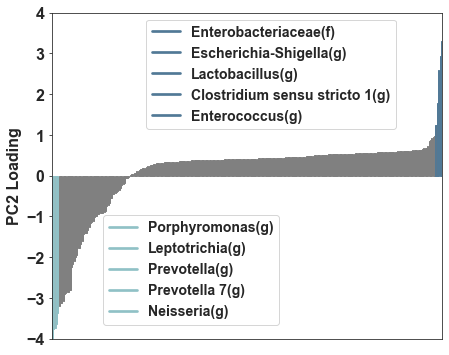

In [18]:
mpl.rcParams['ytick.labelsize'] = 16
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
        
_df = df_features_list[4].sort_values('PC2 Loading', ascending=True)
clrs = [pal[9] if (x > _df['PC2 Loading'].tolist()[-6]) else pal[0] if (x < _df['PC2 Loading'].tolist()[5]) else 'grey' for x in _df['PC2 Loading'].tolist()]

sns.barplot(ax=ax1, x=_df.index, y='PC2 Loading', data=_df, palette=clrs, edgecolor=clrs)
ax1.set_xticklabels('')
ax1.set_ylabel('PC2 Loading', fontsize=16, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylim(-4,4)
ax1.set_xticks([])
        
leg1 = ax1.legend(pd.DataFrame(_df.head(n=5)).merge(df_col_names_list[4], left_index=True, right_index=True)['label'],
                                                             loc='upper right', fontsize=14, bbox_to_anchor=(0.6, 0.4))
leg2 = ax1.legend(pd.DataFrame(_df.tail(n=5).iloc[::-1]).merge(df_col_names_list[4], left_index=True, right_index=True)['label'],
                  loc='upper right', fontsize=14, bbox_to_anchor=(0.9, 1))

ax1.add_artist(leg1)
leg2.legendHandles[0].set_color(pal[9])
leg2.legendHandles[1].set_color(pal[9])
leg2.legendHandles[2].set_color(pal[9])
leg2.legendHandles[3].set_color(pal[9])
leg2.legendHandles[4].set_color(pal[9])

leg1.legendHandles[0].set_color(pal[0])
leg1.legendHandles[1].set_color(pal[0])
leg1.legendHandles[2].set_color(pal[0])
leg1.legendHandles[3].set_color(pal[0])
leg1.legendHandles[4].set_color(pal[0])

#fig.savefig('PC2_feature_genus.png', dpi=200, bbox_inches='tight')
#fig.savefig('PC2_feature_genus.pdf', bbox_inches='tight', transparent=True)

### Correlate metadata categories with PC space

In [19]:
continuous_var = ['Copies/mL', 'bloating_vas', 'excess_gas_vas', 'incomplete_evac_vas', 
            'constipation_vas', 'diarrhea_vas', 'urgency_vas', 'IFNY', 'GM-CSF', 'IL13', 'IL4',
            'IL12P70', 'IL5', 'IL6', 'IL10', 'TNFA', 'IL8', 'IL2', 'IL1B', 'MCP1', 'Age (years)', 'weight (lbs)', 'anaerobic_percent',
            'bloating>50th', 'excess_gas>50th', 'incomplete_evac>50th', 
            'constipation>50th', 'diarrhea>50th', 'urgency>50th', 'Shannon_Diversity', 'Evenness']

df_pca_corr = pd.DataFrame(columns=['PC1_corr', 'PC2_corr', 'Magnitude', 'PC1_scaled', 'PC2_scaled', 'Magnitude_scaled', 'PC1_pvalue', 'PC2_pvalue'])

level=4

for var in continuous_var:
    pc1_corr, pc1_pvalue = stats.spearmanr(df_pca_list[level]['PC1'], df_pca_list[level][var], nan_policy='omit')
    pc2_corr, pc2_pvalue = stats.spearmanr(df_pca_list[level]['PC2'], df_pca_list[level][var], nan_policy='omit')
    
    # Calculate scaled correlations to overlay on PC plot
    if pc1_corr>0:
        pc1_scaled = pc1_corr*max(df_pca_list[level]['PC1'])
    else:
        pc1_scaled = pc1_corr*min(df_pca_list[level]['PC1'])
    
    if pc2_corr>0:
        pc2_scaled = pc2_corr*max(df_pca_list[level]['PC2'])
    else:
        pc2_scaled = -1*pc2_corr*min(df_pca_list[level]['PC2'])
    
    df_pca_corr.loc[var] = [pc1_corr, pc2_corr, np.sqrt(pc1_corr**2+pc2_corr**2), pc1_scaled, pc2_scaled, np.sqrt(pc1_scaled**2+pc2_scaled**2), pc1_pvalue, pc2_pvalue]

In [20]:
# Sort by the magnitude in PC1/2 space
df_pca_corr.sort_values('Magnitude', ascending=False, inplace=True)
df_pca_corr

PC1_corr  PC2_corr  Magnitude  PC1_scaled  PC2_scaled  \
Copies/mL            -0.989226  0.099248   0.994192   49.936833    1.686726   
Shannon_Diversity    -0.196508 -0.742184   0.767758    9.919861   -6.026755   
anaerobic_percent    -0.042023 -0.631271   0.632668    2.121349   -5.126112   
Evenness              0.136393 -0.420946   0.442491    7.115889   -3.418205   
incomplete_evac_vas  -0.088175  0.233936   0.250002    4.451163    3.975775   
bloating_vas          0.041244  0.242641   0.246121    2.151786    4.123718   
incomplete_evac>50th -0.101217  0.220209   0.242358    5.109527    3.742490   
IL8                  -0.026677  0.238113   0.239603    1.346677    4.046767   
constipation_vas     -0.005425  0.225991   0.226056    0.273883    3.840745   
IL1B                 -0.156344 -0.142324   0.211422    7.892342   -1.155711   
urgency>50th         -0.108924  0.158390   0.192229    5.498560    2.691859   
urgency_vas          -0.099456  0.155428   0.184525    5.020629    2.641521   
Age (years)          -0.116094  0.137340   0.179834    5.860504    2.334116   
constipation>50th     0.062295  0.168012   0.179189    3.250052    2.855383   
TNFA                 -0.084517  0.157271   0.178542    4.266463    2.672835   
excess_gas_vas       -0.067272  0.133094   0.149129    3.395927    2.261956   
excess_gas>50th      -0.057110  0.137410   0.148805    2.882958    2.335294   
diarrhea_vas         -0.069598  0.130203   0.147637    3.513377    2.212816   
IL2                  -0.095411 -0.109368   0.145137    4.816417   -0.888102   
IL10                  0.015726  0.144019   0.144875    0.820446    2.447617   
bloating>50th         0.048229  0.130379   0.139013    2.516198    2.215804   
IL12P70              -0.090995 -0.084292   0.124037    4.593505   -0.684476   
weight (lbs)          0.057008 -0.086362   0.103481    2.974211   -0.701288   
diarrhea>50th        -0.059705  0.070067   0.092054    3.013933    1.190791   
MCP1                 -0.072612  0.048687   0.087424    3.665509    0.827447   
GM-CSF               -0.074467  0.035486   0.082489    3.759127    0.603084   
IL4                  -0.069493  0.022915   0.073174    3.508079    0.389452   
IFNY                 -0.058412  0.040748   0.071221    2.948684    0.692516   
IL13                 -0.050233  0.038439   0.063253    2.535818    0.653280   
IL6                  -0.062521  0.007964   0.063026    3.156111    0.135354   
IL5                  -0.045984  0.022098   0.051018    2.321302    0.375566   

                      Magnitude_scaled     PC1_pvalue    PC2_pvalue  
Copies/mL                    49.965311  5.790664e-209  1.175257e-01  
Shannon_Diversity            11.607127   1.796350e-03  5.376552e-45  
anaerobic_percent             5.547715   5.083536e-01  3.360484e-29  
Evenness                      7.894302   3.109591e-02  3.707915e-12  
incomplete_evac_vas           5.968219   1.760864e-01  2.802566e-04  
bloating_vas                  4.651369   5.274796e-01  1.618223e-04  
incomplete_evac>50th          6.333522   1.201900e-01  6.397800e-04  
IL8                           4.264958   6.860584e-01  2.521893e-04  
constipation_vas              3.850498   9.337853e-01  4.546238e-04  
IL1B                          7.976511   1.716442e-02  3.022388e-02  
urgency>50th                  6.122113   9.433161e-02  1.464997e-02  
urgency_vas                   5.673125   1.268098e-01  1.663377e-02  
Age (years)                   6.308217   6.686098e-02  2.993460e-02  
constipation>50th             4.326205   3.396392e-01  9.561990e-03  
TNFA                          5.034556   1.996104e-01  1.650855e-02  
excess_gas_vas                4.080289   3.023868e-01  4.063408e-02  
excess_gas>50th               3.710127   3.814300e-01  3.449413e-02  
diarrhea_vas                  4.152153   2.859344e-01  4.524360e-02  
IL2                           4.897611   1.474174e-01  9.654571e-02  
IL10                          2.581465   8.116874e-01  2.829117e-02  
bloating>50th          

### PC plot colored by SIBO classification

Text(0.5, 1.0, '')

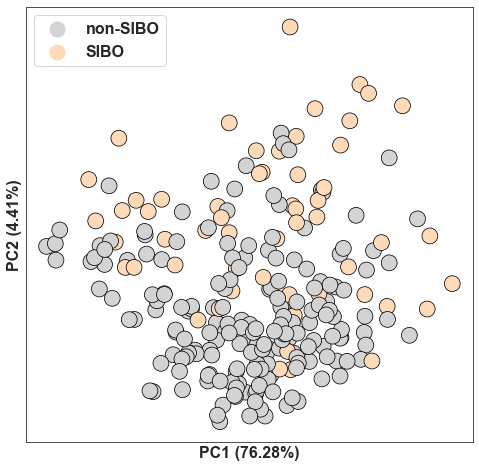

In [21]:
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['font.weight'] = 'bold'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
tax_level_list = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

ax1 = fig.add_subplot(111)
_df = df_pca_list[4]

_df['PC1_inverse'] = _df['PC1']*-1

sns.scatterplot(ax=ax1, x='PC1_inverse', y='PC2', hue='SIBO', data=_df, s=250, palette=['lightgrey', 'PeachPuff'], edgecolor='k')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[1:], ['non-SIBO', 'SIBO'], loc='upper left', markerscale=2.5, fontsize=16)

ax1.set_xlabel('PC1 (' + str(round(pca_list[4].explained_variance_ratio_[0]*100,2)) + '%)', fontsize=16, fontweight='bold')
ax1.set_ylabel('PC2 (' + str(round(pca_list[4].explained_variance_ratio_[1]*100,2)) + '%)', fontsize=16, fontweight='bold')
ax1.set_title('', fontsize=20, fontweight='bold')

#fig.savefig('genus_pca_SIBO.png', dpi=200, bbox_inches='tight')
#fig.savefig('genus_pca_SIBO.pdf', bbox_inches='tight', transparent=True)

### PC plot with top metadata correlates for PC1 and PC2 overlaid on plot

Text(9.919860605101945, -9.026754837992854, 'Shannon\nDiversity')

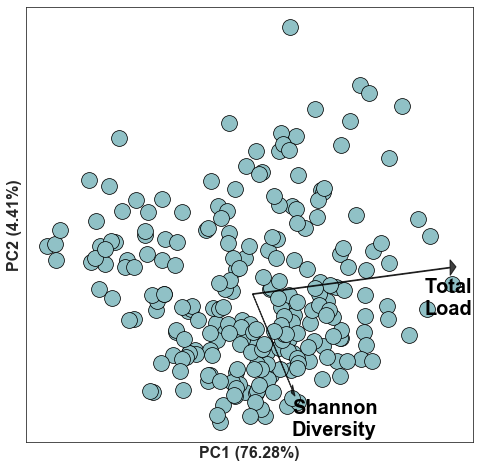

In [16]:
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['font.weight'] = 'bold'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
tax_level_list = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

ax1 = fig.add_subplot(111)
_df = df_pca_list[4]

colors = ['lightgrey'] + sns.color_palette('Set3', 12)

sns.scatterplot(ax=ax1, x='PC1_inverse', y='PC2', data=_df, s=250, color=pal[0], edgecolor='k')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[1:], ['no SIBO', 'SIBO'], loc='upper left', markerscale=2.5, fontsize=16)

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax1.set_xlabel('PC1 (' + str(round(pca_list[4].explained_variance_ratio_[0]*100,2)) + '%)', fontsize=16, fontweight='bold')
ax1.set_ylabel('PC2 (' + str(round(pca_list[4].explained_variance_ratio_[1]*100,2)) + '%)', fontsize=16, fontweight='bold')
ax1.set_title('', fontsize=20, fontweight='bold')
ax1.get_legend().remove()
ax1.arrow(0, 0, df_pca_corr.iloc[0]['PC1_scaled'], df_pca_corr.iloc[0]['PC2_scaled'], color='k', width=0.05, head_width=1, alpha=0.75)
ax1.arrow(0, 0, df_pca_corr.iloc[1]['PC1_scaled'], df_pca_corr.iloc[1]['PC2_scaled'], color='k', width=0.05, head_width=0.6, alpha=0.75)

ax1.text(df_pca_corr.iloc[0]['PC1_scaled']-6.5, df_pca_corr.iloc[0]['PC2_scaled']-3, 'Total\nLoad', color='k', fontsize=20)
ax1.text(df_pca_corr.iloc[1]['PC1_scaled'], df_pca_corr.iloc[1]['PC2_scaled']-3, 'Shannon\nDiversity', color='k', fontsize=20)
#fig.savefig('genus_pca.png', dpi=200, bbox_inches='tight')
#fig.savefig('genus_pca.pdf', bbox_inches='tight', transparent=True)

### Correlation of symptoms with PC1 and PC2

In [22]:
continuous_var = ['bloating_vas', 'excess_gas_vas', 'incomplete_evac_vas', 
            'constipation_vas', 'diarrhea_vas', 'urgency_vas']

df_pca_corr = pd.DataFrame(columns=['PC1_corr', 'PC2_corr', 'Magnitude', 'PC1_scaled', 'PC2_scaled', 'Magnitude_scaled', 'PC1_pvalue', 'PC2_pvalue'])

level=4

for var in continuous_var:
    pc1_corr, pc1_pvalue = stats.spearmanr(df_pca_list[level]['PC1'], df_pca_list[level][var], nan_policy='omit')
    pc2_corr, pc2_pvalue = stats.spearmanr(df_pca_list[level]['PC2'], df_pca_list[level][var], nan_policy='omit')
    
    if pc1_corr>0:
        pc1_scaled = pc1_corr*max(df_pca_list[level]['PC1'])
    else:
        pc1_scaled = -1*pc1_corr*min(df_pca_list[level]['PC1'])
    
    if pc2_corr>0:
        pc2_scaled = pc2_corr*max(df_pca_list[level]['PC2'])
    else:
        pc2_scaled = -1*pc2_corr*min(df_pca_list[level]['PC2'])
    
    df_pca_corr.loc[var] = [pc1_corr, pc2_corr, np.sqrt(pc1_corr**2+pc2_corr**2), pc1_scaled, pc2_scaled, np.sqrt(pc1_scaled**2+pc2_scaled**2), pc1_pvalue, pc2_pvalue]

In [23]:
df_pca_corr_PC2_symptom = df_pca_corr.sort_values('PC2_pvalue')[['PC2_corr', 'PC2_pvalue']].reset_index()
df_pca_corr_PC2_symptom['color'] = np.where(df_pca_corr_PC2_symptom['PC2_corr']>0.16, 'lightblue', 'lightgrey')
df_pca_corr_PC2_symptom

index  PC2_corr  PC2_pvalue      color
0         bloating_vas  0.242641    0.000162  lightblue
1  incomplete_evac_vas  0.233936    0.000280  lightblue
2     constipation_vas  0.225991    0.000455  lightblue
3          urgency_vas  0.155428    0.016634  lightgrey
4       excess_gas_vas  0.133094    0.040634  lightgrey
5         diarrhea_vas  0.130203    0.045244  lightgrey

(0.1, 0.28)

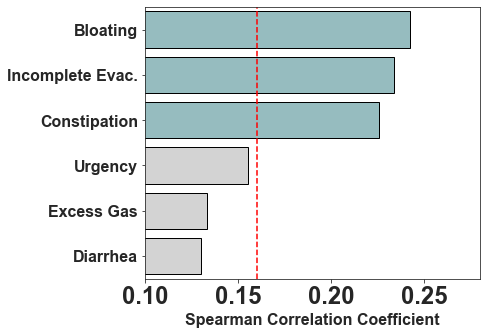

In [24]:
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)

sns.barplot(x='PC2_corr', y='index', data=df_pca_corr_PC2_symptom, palette=[pal[0]]*3+['lightgrey']*3, edgecolor='k')
ax1.set_ylabel('')
ax1.set_xlabel('Spearman Correlation Coefficient', fontsize=16, fontweight='bold')
ax1.set_yticklabels(['Bloating', 'Incomplete Evac.', 'Constipation', 'Urgency', 'Excess Gas', 'Diarrhea'], fontsize=16, fontweight='bold')
ax1.axvline(0.16, ls='--', color='red')
ax1.set_xlim(0.1, 0.28)


#fig.savefig('symptom_correlation.png', bbox_inches='tight', dpi=200)
#fig.savefig('symptom_correlation.pdf', bbox_inches='tight', transparent=True)

### Correlation of cytokines with PC1 and PC2

In [25]:
continuous_var = ['IL2','IL4','IL5','IL6','IL8','IL10','IL12P70','IL13','IL1B','TNFA','IFNY','GM-CSF', 'MCP1']

df_pca_corr = pd.DataFrame(columns=['PC1_corr', 'PC2_corr', 'Magnitude', 'PC1_scaled', 'PC2_scaled', 'Magnitude_scaled', 'PC1_pvalue', 'PC2_pvalue'])

level=4

for var in continuous_var:
    pc1_corr, pc1_pvalue = stats.spearmanr(df_pca_list[level]['PC1'], df_pca_list[level][var], nan_policy='omit')
    pc2_corr, pc2_pvalue = stats.spearmanr(df_pca_list[level]['PC2'], df_pca_list[level][var], nan_policy='omit')
    
    if pc1_corr>0:
        pc1_scaled = pc1_corr*max(df_pca_list[level]['PC1'])
    else:
        pc1_scaled = -1*pc1_corr*min(df_pca_list[level]['PC1'])
    
    if pc2_corr>0:
        pc2_scaled = pc2_corr*max(df_pca_list[level]['PC2'])
    else:
        pc2_scaled = -1*pc2_corr*min(df_pca_list[level]['PC2'])
    
    df_pca_corr.loc[var] = [pc1_corr, pc2_corr, np.sqrt(pc1_corr**2+pc2_corr**2), pc1_scaled, pc2_scaled, np.sqrt(pc1_scaled**2+pc2_scaled**2), pc1_pvalue, pc2_pvalue]

In [26]:
df_pca_corr_PC2_cytokine = df_pca_corr.sort_values('PC2_pvalue')[['PC2_corr', 'PC2_pvalue']].reset_index()
df_pca_corr_PC2_cytokine['abs PC2_corr'] = abs(df_pca_corr_PC2_cytokine['PC2_corr'])
df_pca_corr_PC2_cytokine['color'] = np.where(df_pca_corr_PC2_cytokine['PC2_corr']>0.16, 'lightblue', 'lightgrey')
df_pca_corr_PC2_cytokine

index  PC2_corr  PC2_pvalue  abs PC2_corr      color
0       IL8  0.238113    0.000252      0.238113  lightblue
1      TNFA  0.157271    0.016509      0.157271  lightgrey
2      IL10  0.144019    0.028291      0.144019  lightgrey
3      IL1B -0.142324    0.030224      0.142324  lightgrey
4       IL2 -0.109368    0.096546      0.109368  lightgrey
5   IL12P70 -0.084292    0.200812      0.084292  lightgrey
6      MCP1  0.048687    0.490312      0.048687  lightgrey
7      IFNY  0.040748    0.536867      0.040748  lightgrey
8      IL13  0.038439    0.560202      0.038439  lightgrey
9    GM-CSF  0.035486    0.590749      0.035486  lightgrey
10      IL4  0.022915    0.728442      0.022915  lightgrey
11      IL5  0.022098    0.737764      0.022098  lightgrey
12      IL6  0.007964    0.903964      0.007964  lightgrey

In [27]:
mpl.rcParams['ytick.labelsize'] = 20

(-0.28, 0.28)

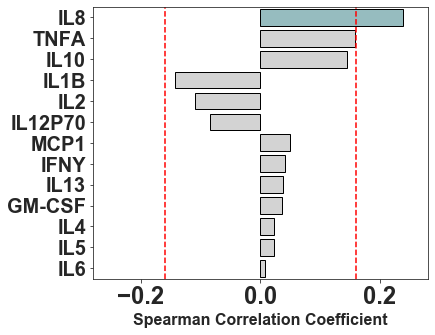

In [28]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)

sns.barplot(x='PC2_corr', y='index', data=df_pca_corr_PC2_cytokine, palette=[pal[0]]+['lightgrey']*12, edgecolor='k')
ax1.set_ylabel('')
ax1.set_xlabel('Spearman Correlation Coefficient', fontsize=16, fontweight='bold')
ax1.axvline(0.16, ls='--', color='red')
ax1.axvline(-0.16, ls='--', color='red')
ax1.set_xlim(-0.28, 0.28)

#fig.savefig('cytokine_correlation.png', bbox_inches='tight', dpi=200)
#fig.savefig('cytokine_correlation.pdf', bbox_inches='tight', transparent=True)

### Calculate Benjamini-Hochberg corrected significance threshold for correlations

In [29]:
pvalues = df_pca_corr_PC2_cytokine['PC2_pvalue'].tolist()+df_pca_corr_PC2_symptom['PC2_pvalue'].tolist()
coeffs = df_pca_corr_PC2_cytokine['PC2_corr'].tolist()+df_pca_corr_PC2_symptom['PC2_corr'].tolist()

qvalues = multi.multipletests(pvalues, method='fdr_bh')[1]

(-0.25, 0.25)

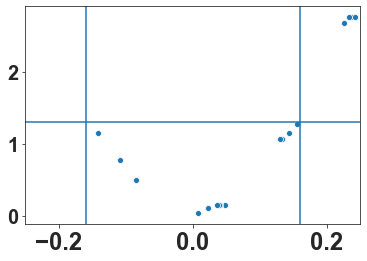

In [30]:
sns.scatterplot(x=coeffs, y=-np.log10(qvalues))

# q-value equal to 5% FDR
plt.axhline(-np.log10(0.05))
plt.axvline(0.16)
plt.axvline(-0.16)
plt.xlim(-0.25,0.25)

### PC plot colored by SIBO classification with marker shape determined by Lactobacillus presence

In [31]:
df_pca_list[4]['Lacto-noSIBO'] = np.where((df_pca_list[4]['SIBO']==0) & (df_pca_list[4]['Lacto']==1), 1, 0)

Text(0.5, 1.0, '')

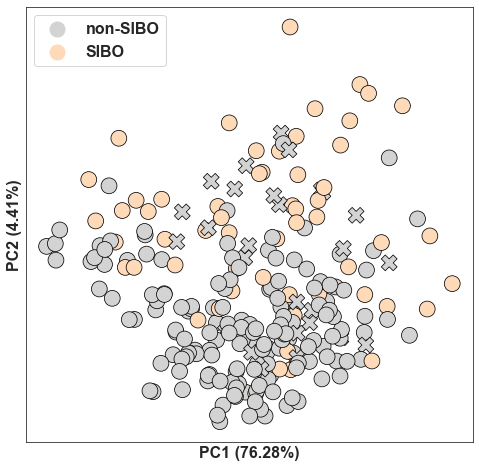

In [33]:
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['font.weight'] = 'bold'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
tax_level_list = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

ax1 = fig.add_subplot(111)
_df = df_pca_list[4]

_df['PC1_inverse'] = _df['PC1']*-1

sns.scatterplot(ax=ax1, x='PC1_inverse', y='PC2', hue='SIBO', style='Lacto-noSIBO', data=_df, s=250, palette=['lightgrey', 'PeachPuff'], edgecolor='k')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[1:3]+handles[4:], ['non-SIBO', 'SIBO'], loc='upper left', markerscale=2.5, fontsize=16)

ax1.set_xlabel('PC1 (' + str(round(pca_list[4].explained_variance_ratio_[0]*100,2)) + '%)', fontsize=16, fontweight='bold')
ax1.set_ylabel('PC2 (' + str(round(pca_list[4].explained_variance_ratio_[1]*100,2)) + '%)', fontsize=16, fontweight='bold')
ax1.set_title('', fontsize=20, fontweight='bold')

#fig.savefig('genus_pca_SIBO_Lacto.png', dpi=200, bbox_inches='tight')
#fig.savefig('genus_pca_SIBO_Lacto.pdf', bbox_inches='tight', transparent=True)